# Topic: Analyzing Best Movies of the decade 2010-2019

# Group 6

# Names: Muktasid Rahman
Email: Muktasid.rahman@baruchmail.cuny.edu

# Project Idea:

Our group has chosen to analyze a imdb page called the best movies in the United States released from 2010 to 2019. For our analysis, we are using the data set from the Internet Movie Database (IMDb) which is an online database of information related to films, TV programs, and streaming online content, etc. But we are mainly concentrating on the top-rated movies released in the United States based on a large number of reviewers' overall opinions on the movies. 

Using a large number of reviewers' opinions on the top movies from IMDb will point out where users liked or disliked the movies and offer other criticism. Our project will be able to analyze how the top-rated movies were picked through the registered members at IMDb because they are able to write reviews, and vote on the ratings on different movies.



# Dateset:
https://www.imdb.com/list/ls069376382/?sort=date_added,desc&st_dt=&mode=detail&page=1

# Part1- Web Scrapping:

In [8]:
#Importing Python libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
from random import randint
import numpy as np
from time import sleep
import seaborn as sns

In [9]:
#We are trying to web scrap the data from this website:

url = 'https://www.imdb.com/list/ls069376382/?sort=date_added,desc&st_dt=&mode=detail&page=1'

#Retriving data from the url variable and store it in the response variable
response = requests.get(url)

#soup contain html content of the imdb page
soup = BeautifulSoup(response.content,'html.parser')

In [10]:
#Shows the data of the page in html format
print(soup)


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///list/ls069376382?src=mdot" name="apple-itunes-app"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Best Movies 2010-2020 - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.

In [11]:
#Created empty list for all the variable so we can store the data inside the list

movies = []
year = []
ratings = []
meta_score = []
duration = []
votes = []
gross = []
genre = []
certificate= []


In [12]:
#Contains all the details about all the movies

movie_data = soup.findAll('div',{'class':'lister-item mode-detail'})
#movie_data

In [13]:
# Using for loop to loop through all the movie data from the IMDB website
for store in movie_data:
    #Store the name of the movie and append it to the movies list
    movie_name = store.h3.a.text
    movies.append(movie_name)
    
    #Store the the release year of the movie and store it to the year list
    movie_year = store.h3.find('span',{"class":'lister-item-year text-muted unbold'}).text.replace('(','').replace(')','').replace('I','')
    year.append(movie_year)
    
    #Store the the moving ratings store it to the yratings list
    movie_rating = store.find('span',{"class":"ipl-rating-star__rating"}).text
    ratings.append(movie_rating)
    
    #Store the the meta score of the movie and store it to the meta_score list
    score = store.find('div',{"class":"inline-block ratings-metascore"}).span.text.replace(' ','')
    meta_score.append(score)
    
    #Store the duration of the movie in the duration list
    movie_time = store.p.find('span',{"class":"runtime"}).text.replace(' min','')
    duration.append(movie_time)
    
    
    value = store.find_all('span',{'name':'nv'})
    #Store the movie vite in the votes list
    movie_vote = value[0].text
    votes.append(movie_vote)
    
    #Store the gross of yje movie in the gross list
    movie_gross = value[1].text.replace('$','').replace('M','') if len(value) > 1 else '0'
    gross.append(movie_gross)
    
    #Store the movie_cert in the certification list
    movie_cer = store.find('span',{"class":"certificate"}).text if  store.find('span',{"class":"certificate"}) else 'NA'
    certificate.append(movie_cer)
    
    #Store the genre of the movie in the genre list
    movie_genre = store.find('span',{"class":"genre"}).text.replace("\n","").replace('(','')
    genre.append(movie_genre)

# Part2- Numpy and Pandas:

In [14]:
#Importing python libraries to clean the data

import pandas as pd
import numpy as np

In [15]:
#Coverting all the list in to the DataFrame

df = pd.DataFrame({"name":movies, 'year':year, 'ratings':ratings, 'meta_score':meta_score, 'duration':duration, 'votes':votes, 'gross':gross,  'certificate': certificate, 'genre':genre})

In [16]:
#Shows the first 5 movie data
df.head()

,name,year,ratings,meta_score,duration,votes,gross,certificate,genre
0,Maiden,2018,7.7,82,97,"1,950",3.01,PG,"Documentary, Biography, Sport"
1,Custody,2017,7.5,83,93,"8,477",0.08,NA,Drama
2,1917,2019,8.3,78,119,"465,294",159.23,R,"Drama, Thriller, War"
3,Booksmart,2019,7.2,84,102,"99,858",22.68,R,Comedy
4,Little Women,2019,7.8,91,135,"155,615",108.10,PG,"Drama, Romance"


In [17]:
#Shows the Last 5 movie
df.tail()

,name,year,ratings,meta_score,duration,votes,gross,certificate,genre
95,Spotlight,2015,8.1,93,129,"432,203",45.06,R,"Biography, Crime, Drama"
96,Paddington,2014,7.2,77,95,"102,093",76.27,PG,"Animation, Adventure, Comedy"
97,Her,2013,8,90,126,"555,372",25.57,R,"Drama, Romance, Sci-Fi"
98,About Time,2013,7.8,55,123,"314,405",15.32,R,"Comedy, Drama, Fantasy"
99,The Secret Life of Walter Mitty,2013,7.3,54,114,"298,440",58.24,PG,"Adventure, Comedy, Drama"


In [18]:
#96 movies has information regarding the gross of the film
# Since none of gross values has any na values we can assume 4 rows has the value zero.

np.count_nonzero(df['gross'])

100

In [19]:
'''
Shows the data types for all(9) columns. 
As of right now all the columns are object types
which mean that they are in string and combination string and numeric format.
Therefore we have to convert some of the the column data type to int64 which is integer data type.
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         100 non-null    object
 1   year         100 non-null    object
 2   ratings      100 non-null    object
 3   meta_score   100 non-null    object
 4   duration     100 non-null    object
 5   votes        100 non-null    object
 6   gross        100 non-null    object
 7   certificate  100 non-null    object
 8   genre        100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB


In [20]:
#Shows the number of rows and columns
# We have 100 rows and 9 columns
df.shape

(100, 9)

In [21]:
#Converting the string data types to integers and float

df['year'] = df['year'].astype(str).astype(int)
df['ratings'] = df['ratings'].str.replace(',','').astype(float)
df['meta_score']= df['meta_score'].astype(str).astype(int)
df['duration'] = df['duration'].astype(str).astype(int)
df['votes'] = df['votes'].str.replace(',','').astype(int)
df['gross'] = df['gross'].astype(float)

In [22]:
'''As we can see year, ratings, meta score, duration, votes,
gross are no longer in string data type
'''
df.dtypes

name            object
year             int32
ratings        float64
meta_score       int32
duration         int32
votes            int32
gross          float64
certificate     object
genre           object
dtype: object

In [23]:
#We are converting the column gross from the dataframe to numpy and printing the array.
movie_gross = df['gross'].to_numpy()
movie_gross

array([3.0100e+00, 8.0000e-02, 1.5923e+02, 2.2680e+01, 1.0810e+02,
       3.5000e-01, 3.5900e+00, 1.7400e+00, 1.2100e+01, 3.1100e+00,
       0.0000e+00, 4.7840e+01, 7.9000e-01, 5.3000e-01, 3.4400e+00,
       5.3370e+01, 5.0400e+00, 1.3000e+00, 0.0000e+00, 1.1762e+02,
       1.0100e+00, 7.7000e-01, 6.0500e+00, 1.3540e+01, 4.9280e+01,
       3.3300e+00, 8.5080e+01, 3.4370e+01, 0.0000e+00, 3.3100e+00,
       3.2730e+01, 4.4000e-01, 5.6470e+01, 4.0440e+01, 9.2050e+01,
       3.0010e+01, 2.1020e+01, 0.0000e+00, 3.1200e+00, 2.4876e+02,
       3.3420e+02, 1.8100e+01, 1.8837e+02, 6.3860e+01, 5.4510e+01,
       3.7100e+00, 1.3200e+00, 3.3000e-01, 4.1000e-01, 4.4000e-01,
       1.0100e+00, 3.3600e+00, 5.3218e+02, 4.8020e+01, 4.7700e+01,
       1.6961e+02, 2.2843e+02, 3.2900e+00, 6.8600e+00, 1.0100e+00,
       1.1000e-01, 1.0400e+00, 9.2190e+01, 6.5300e+00, 1.7124e+02,
       2.9258e+02, 9.6960e+01, 1.8340e+01, 3.5060e+01, 7.1000e+00,
       5.7900e+00, 1.3300e+01, 7.5610e+01, 5.6820e+01, 1.5500e

In [24]:
#The maximum gross of the film is 532.18 Million

movie_gross.max()

532.18

In [25]:
#The average gross of the films is 55.68 Million
movie_gross.mean()

55.68879999999999

In [26]:
#We are trying to find if there are any values for the gross column
df.isna().sum()

name           0
year           0
ratings        0
meta_score     0
duration       0
votes          0
gross          0
certificate    0
genre          0
dtype: int64

In [27]:
#Checking to see how many na values we have our rows

df.isnull().sum()

name           0
year           0
ratings        0
meta_score     0
duration       0
votes          0
gross          0
certificate    0
genre          0
dtype: int64

In [28]:
#Shows statistics of the gross:
#The average gross of the films is 55.68 Million
#The maximum gross of the film is 532.18 Million

df['gross'].describe()

count    100.000000
mean      55.688800
std       89.734005
min        0.000000
25%        1.692500
50%       16.710000
75%       58.455000
max      532.180000
Name: gross, dtype: float64

In [29]:
#Shows statistics of ratings:
#The lowest rating for a film is 6.6 and the highest rating is 8.8

df['ratings'].describe()

count    100.000000
mean       7.594000
std        0.462715
min        6.600000
25%        7.300000
50%        7.600000
75%        7.825000
max        8.800000
Name: ratings, dtype: float64

In [30]:
#Shows statistics of duration of the movie:
#The average movie time is 116.69 Minute which is 1 hour 56 minutes 59 seconds
#The shortest film has 1 hour 24 minutes duration
#The longest film has 3 hour 9 minutes duration

df['duration'].describe()

count    100.000000
mean     116.590000
std       19.411594
min       84.000000
25%      100.000000
50%      115.500000
75%      130.000000
max      189.000000
Name: duration, dtype: float64

# Part3: – Data Combine, Merge, Load  highlight:

In [31]:
#Dropping duplicates row if there is any
df = df.drop_duplicates()

In [32]:
#The genre column has multiple genre seperated by the coma. 
#We feel that the first two genre listed are the most signficant ones.

new_genre = df.genre.str.split(',',expand=True).iloc[:,0:2]
new_genre.columns=['genre_1','genre_2']
new_genre

,genre_1,genre_2
0,Documentary,Biography
1,Drama,None
2,Drama,Thriller
3,Comedy,None
4,Drama,Romance
...,...,...
95,Biography,Crime
96,Animation,Adventure
97,Drama,Romance
98,Comedy,Drama


In [33]:
#Sorting the dataset by the column gross and votes in descending order.

df.sort_values(by=['gross','votes'],ascending=False,inplace=True)
df.head()

,name,year,ratings,meta_score,duration,votes,gross,certificate,genre
52,Rogue One: A Star Wars Story,2016,7.8,65,133,569216,532.18,PG-13,"Action, Adventure, Sci-Fi"
40,Spider-Man: Homecoming,2017,7.4,73,133,534132,334.20,PG-13,"Action, Adventure, Sci-Fi"
75,Skyfall,2012,7.7,81,143,639228,304.36,PG-13,"Action, Adventure, Thriller"
65,Inception,2010,8.8,74,148,2121803,292.58,PG-13,"Action, Adventure, Sci-Fi"
83,Captain America: The Winter Soldier,2014,7.7,70,136,757928,259.77,PG-13,"Action, Adventure, Sci-Fi"


In [34]:
#The movies that only has one genre and doesn't have a second genre it will be replaced by the first genre.

new_genre['genre_2'].fillna(new_genre['genre_1'],inplace=True)
new_genre

,genre_1,genre_2
0,Documentary,Biography
1,Drama,Drama
2,Drama,Thriller
3,Comedy,Comedy
4,Drama,Romance
...,...,...
95,Biography,Crime
96,Animation,Adventure
97,Drama,Romance
98,Comedy,Drama


In [35]:
#We are merging the new_grenre dataframe with the original dataframe
df1 = pd.concat([df,new_genre],axis=1)
df1.head()

,name,year,ratings,meta_score,duration,votes,gross,certificate,genre,genre_1,genre_2
0,Maiden,2018,7.7,82,97,1950,3.01,PG,"Documentary, Biography, Sport",Documentary,Biography
1,Custody,2017,7.5,83,93,8477,0.08,NA,Drama,Drama,Drama
2,1917,2019,8.3,78,119,465294,159.23,R,"Drama, Thriller, War",Drama,Thriller
3,Booksmart,2019,7.2,84,102,99858,22.68,R,Comedy,Comedy,Comedy
4,Little Women,2019,7.8,91,135,155615,108.10,PG,"Drama, Romance",Drama,Romance


# Part4a: – Data Aggregation highlight:  

In [36]:
#Highest gross movie is Action and Adventure genre which is 344.618 Million dollars
df1.groupby(['genre_1','genre_2']).gross.mean().sort_values(ascending=False).head(5)

genre_1    genre_2             
Action      Adventure              344.618
Drama       Western                171.240
            Thriller               159.230
Action      Drama                  140.210
Animation   Action                 132.800
Name: gross, dtype: float64

In [37]:
#we are choosing the first genre and we will find the average revenue for the top 5 genre from our dataset
gen_rev = df1.groupby(['genre_1']).gross.mean()

In [38]:
#Converting python series into a data frame and reseting the index
#showing the top 5 genre and their respective gross revenue from highest to lowest
genre_rev = gen_rev.to_frame()
genre_rev.reset_index(inplace=True)
gen_rev = genre_rev.sort_values(by=['gross'],ascending=False).head(5)
gen_rev

,genre_1,gross
0,Action,265.141250
2,Animation,126.214000
1,Adventure,81.153750
3,Biography,57.267500
6,Crime,27.458333


# Part4b: – Data Visualization highlight:

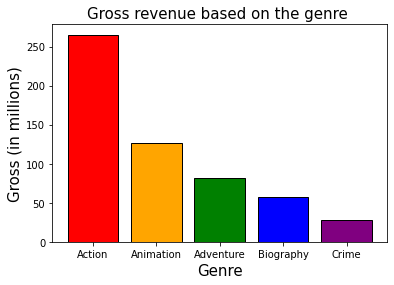

In [39]:
#Created a bar chart to show the average gross revenue based on the genre of the movie
from matplotlib import pyplot as plt
gen = gen_rev['genre_1']
gro = gen_rev['gross']
plt.bar(gen,gro,color = ['red','orange','green','blue','purple'], edgecolor = 'black')
plt.xlabel("Genre",fontdict={'fontsize': 15, 'fontweight': 3, 'color': 'Black'})
plt.ylabel("Gross (in millions)",fontdict={'fontsize': 15, 'fontweight': 3, 'color': 'Black'})
plt.title("Gross revenue based on the genre ",{'fontsize': 15, 'fontweight': 3, 'color': 'Black'})
plt.show()

In [40]:
#
gen_dur = df1.groupby(['genre_1']).duration.mean()
gen_dur

genre_1
Action                139.375000
Adventure             120.750000
Animation             100.800000
Biography             129.812500
Comedy                107.388889
Comedy                102.000000
Crime                 114.333333
Documentary            92.000000
Drama                 114.333333
Drama                 111.666667
Name: duration, dtype: float64

In [41]:
genre_dur = gen_dur.to_frame()
genre_dur.reset_index(inplace=True)
genre_dur = genre_dur.sort_values(by=['duration'],ascending=False).head(5)
genre_dur

,genre_1,duration
0,Action,139.375000
3,Biography,129.812500
1,Adventure,120.750000
6,Crime,114.333333
8,Drama,114.333333


Text(0.5, 1.0, 'Average duration of the movie by genre')

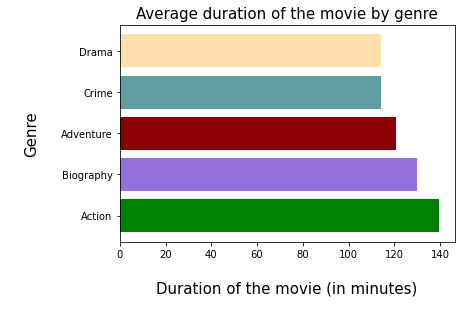

In [42]:
gen = genre_dur['genre_1']
dur = genre_dur['duration']
plt.barh(gen,dur,color = ['Green','MediumPurple','DarkRed','CadetBlue','NavajoWhite'])
plt.ylabel("\nGenre\n",fontdict={'fontsize': 15, 'fontweight': 3, 'color': 'Black'})
plt.xlabel("\nDuration of the movie (in minutes)\n",fontdict={'fontsize': 15, 'fontweight': 3, 'color': 'Black'})
plt.title("Average duration of the movie by genre",fontdict={'fontsize': 15, 'fontweight': 3, 'color': 'Black'})

In [43]:
#
year_gross = df.groupby(['year']).gross.mean()
year_gross

year
2009      0.110000
2010     76.117500
2011     23.920000
2012     69.332500
2013     22.608571
2014     51.389286
2015     37.093333
2016    150.148571
2017     74.970000
2018     21.593846
2019     51.821111
Name: gross, dtype: float64

In [44]:
year_gross = year_gross.to_frame()
year_gross.reset_index(inplace=True)
year_gross

,year,gross
0,2009,0.110000
1,2010,76.117500
2,2011,23.920000
3,2012,69.332500
4,2013,22.608571
5,2014,51.389286
6,2015,37.093333
7,2016,150.148571
8,2017,74.970000
9,2018,21.593846


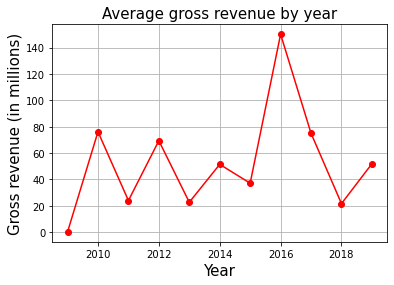

In [45]:
import matplotlib.pyplot as plt
year = year_gross['year']
gross = year_gross['gross']
plt.plot(year,gross,color='red', marker='o')
plt.title('Average gross revenue by year',fontdict={'fontsize': 15, 'fontweight': 3, 'color': 'Black'})
plt.xlabel('Year', fontdict={'fontsize': 15, 'fontweight': 3, 'color': 'Black'})
plt.ylabel('Gross revenue (in millions)', fontdict={'fontsize': 15, 'fontweight': 3, 'color': 'Black'})
plt.grid(True)
plt.show()

In [46]:
#We are trying to find the top 5 highest gross movie
movie_gross = df.groupby(['name']).gross.mean()
movie_gross

name
12 Years a Slave     56.67
127 Hours            18.34
1917                159.23
A Man Called Ove      3.36
A Royal Affair        1.55
                     ...  
Whiplash             13.09
Wild Tales            3.11
Winter's Bone         6.53
Youth                 2.70
Zero Dark Thirty     95.72
Name: gross, Length: 100, dtype: float64

In [47]:
movie_gross = movie_gross.to_frame()
movie_gross.reset_index(inplace=True)
movie_gross = movie_gross.sort_values(by=['gross'],ascending=False).head(5)
movie_gross

,name,gross
68,Rogue One: A Star Wars Story,532.18
75,Spider-Man: Homecoming,334.20
73,Skyfall,304.36
42,Inception,292.58
22,Captain America: The Winter Soldier,259.77


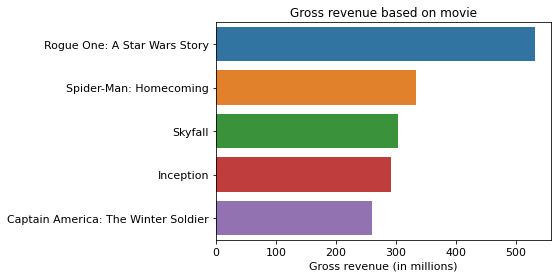

In [48]:
name = movie_gross['name']
gross = movie_gross['gross']

sns.barplot( gross,name,data= movie_gross)
plt.title("Gross revenue based on movie")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel("",fontsize=11) 
plt.xlabel("Gross revenue (in millions)",fontsize=11) 
plt.show()

# Major Accomplishment:

One of the major accomplishments for us as a group was to learn about web scraping. This project has helped us have a basic understanding of web scraping, none of the groups members previously came across web scraping. We felt accomplished when we were able to figure out the web scraping portion of the project.

# Major bottlenecks:

One of the bottlenecks for the project was web scraping. It took us very long to be able to understand how we can extract the data from a website. Since none of the group members were familiar with HTML therefore we struggled to understand the basic HTML syntax. We had to refer to many websites and youtube videos to be able to understand how web scraping works.

# Something that we liked and disiked about the project:

We enjoyed creating visualization. Visualization allowed us to show our findings and be able to tell a story from our data analysis. We didn’t dislike anything about the project but we found the web scraping portion a little challenging.

# Future plan:

We currently do not have any future plan with this project.

# Reference:

https://www.imdb.com/list/ls069376382/?sort=date_added,desc&st_dt=&mode=detail&page=1

https://realpython.com/python-web-scraping-practical-introduction/

https://benalexkeen.com/bar-charts-in-matplotlib/

https://levelup.gitconnected.com/matplotlib-python-ecc7ba303848

https://datatofish.com/line-chart-python-matplotlib/

https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

https://datatofish.com/sort-pandas-dataframe/

https://realpython.com/beautiful-soup-web-scraper-python/

https://www.freecodecamp.org/news/web-scraping-python-tutorial-how-to-scrape-data-from-a-website/

https://opensource.com/article/20/5/web-scraping-python